In [148]:
import pandas as pd
import numpy as np
import tweepy, codecs
import seaborn as sns
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud
from nltk import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rudhra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
consumer_key = "LkcRjyAqpvVR6qxZZT3pyBTa3"
consumer_secret = "qCMR2k52QP7ORTpZwjPxL5j5m218uVQpN35EKi44vOJvq3cxZg"
access_token = "2905147670-sZUAxxBzJnmN6J8CCYOm7ZIQQk88fpRHyaZEUVy"
access_token_secret = "oTj4Li8pAYJR18GCfwppMQfqZJort5Pid5wne4o6R9MLi"

In [3]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

#### Data Extraction

In [4]:
tweets = api.user_timeline('@realDonaldTrump', lang = 'en', result_type = 'recent', count = 200, tweet_mode='extended')

In [5]:
len(tweets)

200

In [6]:
tweets[100]

Status(_api=<tweepy.api.API object at 0x0000025BCF95DF88>, _json={'created_at': 'Sun Nov 08 22:26:27 +0000 2020', 'id': 1325565374138560512, 'id_str': '1325565374138560512', 'full_text': 'https://t.co/VMEU0QBEHA', 'truncated': False, 'display_text_range': [0, 23], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1325549093771505666, 'id_str': '1325549093771505666', 'indices': [0, 23], 'media_url': 'http://pbs.twimg.com/amplify_video_thumb/1325549093771505666/img/kI7h36QdvCyYzSU7.jpg', 'media_url_https': 'https://pbs.twimg.com/amplify_video_thumb/1325549093771505666/img/kI7h36QdvCyYzSU7.jpg', 'url': 'https://t.co/VMEU0QBEHA', 'display_url': 'pic.twitter.com/VMEU0QBEHA', 'expanded_url': 'https://twitter.com/TeamTrump/status/1325549846904889344/video/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1200, 'h': 675, 'resize': 'fit'}, 'small': {'w': 680, 'h': 383, 'resize': 'fit'}, 'large': {'w': 1280

In [44]:
Status =tweets[4]

In [45]:
Status.full_text

'RT @TeamTrump: Help stop voter suppression, irregularities and fraud!\n\nTell us what you are seeing.\n\nReport a case: https://t.co/26KUDTDCnS…'

### Importing the sentiment modal

In [36]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Rudhra\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [37]:
sid = SentimentIntensityAnalyzer()

In [46]:
sid.polarity_scores(Status.full_text)

{'neg': 0.262, 'neu': 0.625, 'pos': 0.113, 'compound': -0.5562}

### Creating dataframe by extracting text

In [47]:
Trump_tweets=[]
for t in tweets:
    Trump_tweets.append(t.full_text)

In [48]:
Trump_tweets[0:5]

['RT @victoriafromDTX: 👇🏼👇🏼👇🏼',
 'RT @PhillyGOP: Voters in Allentown, PA are receiving blank ballots!! WIDESPREAD! \n\n🚨🚨Have you received a blank ballot? Email us photos at e…',
 'RT @EricTrump: 🚨🚨',
 'It attempted to alter our election and got caught? https://t.co/J8mcH4SpxG',
 'RT @TeamTrump: Help stop voter suppression, irregularities and fraud!\n\nTell us what you are seeing.\n\nReport a case: https://t.co/26KUDTDCnS…']

In [52]:
dt = pd.DataFrame(Trump_tweets, columns=['tweets'])

In [53]:
dt.head()

,tweets
0,RT @victoriafromDTX: 👇🏼👇🏼👇🏼
1,"RT @PhillyGOP: Voters in Allentown, PA are rec..."
2,RT @EricTrump: 🚨🚨
3,It attempted to alter our election and got cau...
4,"RT @TeamTrump: Help stop voter suppression, ir..."


### Cleaning the tweets.

In [66]:
import re
def cleaning_text (text):
    text = re.sub(r'pic.twitter.com/[\w]*',"", text) #Removing Twitter picture Urls
    text = re.sub(r"RT @[\w]*:","", text) #Removing retweet
    text = re.sub(r"@[\w]*","", text) #remove twitter handles (@xxx)
    text = re.sub(r"https?://[A-Za-z0-9./\W\s]*","", text)
    text = re.sub(r"https?://[A-Za-z0-9./]*","", text) #Removing https
    text = re.sub(r"\d","", text) # remove numbers
    text = re.sub(r"[^\x00-\x7F]+","", text) # removing non-ascii characters
    text = re.sub(r"https","", text)
    text = re.sub(r"\n"," ", text)
    text = re.sub(r"  "," ", text) # removing double space
    text = text.lower() # Converting the texts to lower case
    return text

In [67]:
Status =tweets[4]
text = Status.full_text
text

'RT @TeamTrump: Help stop voter suppression, irregularities and fraud!\n\nTell us what you are seeing.\n\nReport a case: https://t.co/26KUDTDCnS…'

In [68]:
print(cleaning_text(text))

 help stop voter suppression, irregularities and fraud! tell us what you are seeing. report a case: 


In [69]:
dt.tweets = dt['tweets'].apply(lambda text: cleaning_text(text))

In [70]:
dt.head()

,tweets
0,
1,"voters in allentown, pa are receiving blank b..."
2,
3,it attempted to alter our election and got cau...
4,"help stop voter suppression, irregularities a..."


In [72]:
# droping nan values
dt.dropna(inplace=True)

In [75]:
dt.shape

(200, 1)

In [78]:
# droping blank tweets
dt[dt['tweets'] == ''].shape

(35, 1)

In [79]:
dt[dt['tweets'] == ''].index

Int64Index([  8,  17,  18,  19,  20,  25,  44,  45,  46,  64,  65,  66,  67,
             74,  76,  77,  78,  91,  92,  93,  94,  95,  96,  97,  98,  99,
            100, 149, 150, 151, 152, 186, 187, 190, 191],
           dtype='int64')

In [80]:
dt.drop(dt[dt['tweets'] == ''].index, inplace=True)

In [81]:
dt.shape

(165, 1)

In [82]:
dt.head()

,tweets
0,
1,"voters in allentown, pa are receiving blank b..."
2,
3,it attempted to alter our election and got cau...
4,"help stop voter suppression, irregularities a..."


In [83]:
dt[dt['tweets'] == ' '].index

Int64Index([0, 2, 181, 182, 183, 184, 185], dtype='int64')

In [84]:
dt.drop(dt[dt['tweets'] == ' '].index, inplace=True)

In [85]:
dt.head()

,tweets
1,"voters in allentown, pa are receiving blank b..."
3,it attempted to alter our election and got cau...
4,"help stop voter suppression, irregularities a..."
5,fox news finally acknowledged eight days afte...
6,the liberal media says voter fraud doesn't ha...


In [86]:
dt.shape

(158, 1)

### Finding sentiment scores

In [87]:
dt['scores'] = dt['tweets'].apply(lambda tweet: sid.polarity_scores(tweet))

In [88]:
dt.head()

,tweets,scores
1,"voters in allentown, pa are receiving blank b...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,it attempted to alter our election and got cau...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,"help stop voter suppression, irregularities a...","{'neg': 0.3, 'neu': 0.572, 'pos': 0.129, 'comp..."
5,fox news finally acknowledged eight days afte...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6,the liberal media says voter fraud doesn't ha...,"{'neg': 0.291, 'neu': 0.61, 'pos': 0.1, 'compo..."


In [89]:
dt.scores.head()

1    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.3, 'neu': 0.572, 'pos': 0.129, 'comp...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.291, 'neu': 0.61, 'pos': 0.1, 'compo...
Name: scores, dtype: object

In [90]:
dt['compound']  = dt['scores'].apply(lambda score_dict: score_dict['compound'])

In [91]:
dt.head()

,tweets,scores,compound
1,"voters in allentown, pa are receiving blank b...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,it attempted to alter our election and got cau...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,"help stop voter suppression, irregularities a...","{'neg': 0.3, 'neu': 0.572, 'pos': 0.129, 'comp...",-0.5562
5,fox news finally acknowledged eight days afte...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
6,the liberal media says voter fraud doesn't ha...,"{'neg': 0.291, 'neu': 0.61, 'pos': 0.1, 'compo...",-0.7449


In [93]:
dt.compound.head(20)

1     0.0000
3     0.0000
4    -0.5562
5     0.0000
6    -0.7449
7     0.0000
9     0.2003
10    0.3182
11    0.7979
12    0.8999
13   -0.2244
14    0.6239
15   -0.4939
16    0.0000
21    0.8122
22    0.0000
23   -0.4926
24    0.6239
26   -0.5709
27    0.5256
Name: compound, dtype: float64

### Classifying the sentiments

In [94]:
def sentimentClassifier (x):
    if x >= 0.05:
        return "Positive"
    elif (x > -0.05) and (x < 0.05):
        return "Neutral"
    else:
        return "Negative"
    

In [96]:
dt['Sentiment'] = dt['compound'].apply(lambda score: sentimentClassifier(score))

In [97]:
dt.head()

,tweets,scores,compound,Sentiment
1,"voters in allentown, pa are receiving blank b...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3,it attempted to alter our election and got cau...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4,"help stop voter suppression, irregularities a...","{'neg': 0.3, 'neu': 0.572, 'pos': 0.129, 'comp...",-0.5562,Negative
5,fox news finally acknowledged eight days afte...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
6,the liberal media says voter fraud doesn't ha...,"{'neg': 0.291, 'neu': 0.61, 'pos': 0.1, 'compo...",-0.7449,Negative


### Visualizing the sentiments.

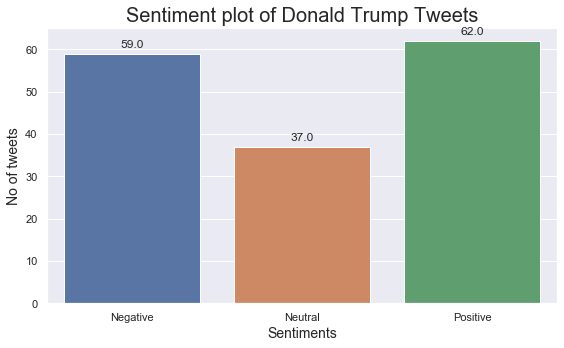

In [112]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="Sentiment",data=dt, order=['Negative', 'Neutral', 'Positive'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Sentiment plot of Donald Trump Tweets', fontsize=20)
plt.ylabel('No of tweets', fontsize=14)
plt.xlabel('Sentiments', fontsize=14)
plt.tight_layout()
plt.show()

In [109]:
dt.Sentiment.value_counts()

Positive    62
Negative    59
Neutral     37
Name: Sentiment, dtype: int64

### Most Negatively spoken words

In [113]:
dt.head()

,tweets,scores,compound,Sentiment
1,"voters in allentown, pa are receiving blank b...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3,it attempted to alter our election and got cau...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4,"help stop voter suppression, irregularities a...","{'neg': 0.3, 'neu': 0.572, 'pos': 0.129, 'comp...",-0.5562,Negative
5,fox news finally acknowledged eight days afte...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
6,the liberal media says voter fraud doesn't ha...,"{'neg': 0.291, 'neu': 0.61, 'pos': 0.1, 'compo...",-0.7449,Negative


In [134]:
Neg_tweets = dt[dt['Sentiment'] == 'Negative']['tweets'].to_list()

In [135]:
Neg_tweets[0:10]

[' help stop voter suppression, irregularities and fraud! tell us what you are seeing. report a case: ',
 " the liberal media says voter fraud doesn't happen. they're lying. someone used the identities of dead people to vote in",
 'everyone is asking why the recent presidential polls were so inaccurate when it came to me. because they are fake, just like much of the lamestream media!',
 ' there is new information about dead people voting in the general election. well investigate tonight at pm et on #foxne',
 'the fake pollsters at / produced a possibly illegal suppression poll just before the election showing me down points in wisconsin when, in fact, on election day, the race was even - &amp; we are now preparing to win the state. many such deplorable instances!',
 ' republicans, dont let andrew mccabe continue to get away with totally criminal activity. what he did should never be',
 ' president s pursuit of voter fraud is not only essential to determine the outcome of this election,

In [152]:
def cleaning_Unwanted (text):
    tokens = word_tokenize(text)
    text = " ".join([c for c in tokens if c not in stopwords.words('english')])
    text = re.sub(r"[!|:|&|;|#|(|)|\|/]","", text) # removing special characters
    text = text.lower() # Converting the texts to lower case
    text = "".join([c for c in text if c not in string.punctuation]) #Remove punctuation
    return text

In [153]:
Neg_tweets_Cleaned = [cleaning_Unwanted(x) for x in Neg_tweets]

In [154]:
Neg_tweets_Cleaned[0:10]

['help stop voter suppression  irregularities fraud  tell us seeing  report case ',
 'liberal media says voter fraud nt happen  re lying  someone used identities dead people vote',
 'everyone asking recent presidential polls inaccurate came  fake  like much lamestream media ',
 'new information dead people voting general election  well investigate tonight pm et  foxne',
 'fake pollsters  produced possibly illegal suppression poll election showing points wisconsin  fact  election day  race even   amp  preparing win state  many deplorable instances ',
 'republicans  dont let andrew mccabe continue get away totally criminal activity  never',
 'president pursuit voter fraud essential determine outcome election ',
 'people accept rigged election ',
 ' pa s dead voters actually dwarfed number ghost voters nationwide  dearly departed  reanimated',
 'philadelphia watching fraud happen  heres went']

In [156]:
Neg_text=''
for text in Neg_tweets_Cleaned:
    Neg_text = Neg_text+text

(-0.5, 1999.5, 999.5, -0.5)

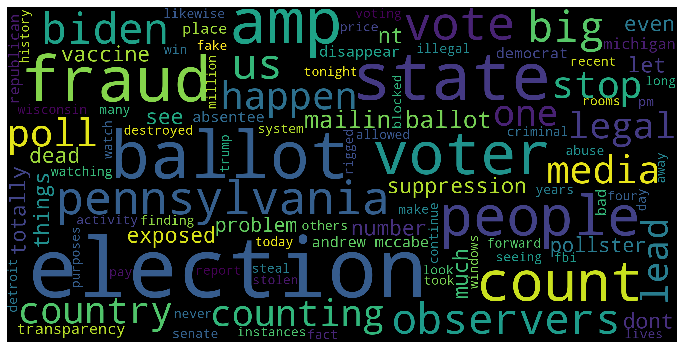

In [161]:
wordcloud = WordCloud(width = 2000, height = 1000, max_font_size = 250, max_words=100).generate(Neg_text)
plt.figure(figsize=(12,12))
ax =plt.imshow(wordcloud)
plt.axis("off")

In [163]:
from nltk.probability import FreqDist
fdist = FreqDist(word_tokenize(Neg_text))
Neg_Freq_words=fdist.most_common(20)
Neg_Freq_words

[('election', 16),
 ('ballot', 10),
 ('fraud', 9),
 ('amp', 9),
 ('people', 7),
 ('count', 7),
 ('voter', 6),
 ('state', 6),
 ('pennsylvania', 6),
 ('us', 5),
 ('big', 5),
 ('biden', 5),
 ('observers', 5),
 ('stop', 4),
 ('media', 4),
 ('happen', 4),
 ('country', 4),
 ('counting', 4),
 ('would', 4),
 ('votes', 4)]

In [164]:
dat = pd.DataFrame(Neg_Freq_words,columns=["Frequent words", "Frequency"])
dat

,Frequent words,Frequency
0,election,16
1,ballot,10
2,fraud,9
3,amp,9
4,people,7
5,count,7
6,voter,6
7,state,6
8,pennsylvania,6
9,us,5


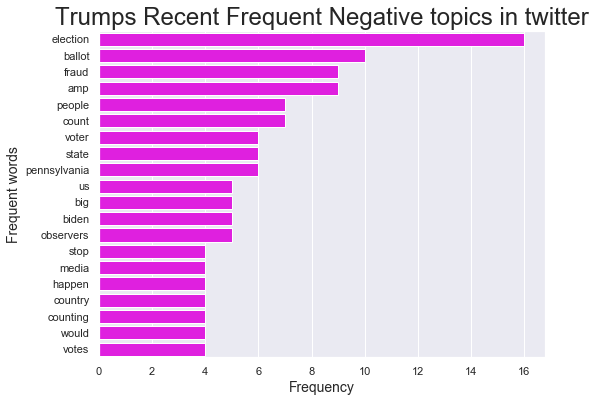

In [166]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x="Frequency", y="Frequent words", data=dat,color="magenta")
plt.title('Trumps Recent Frequent Negative topics in twitter', fontsize=24)
plt.ylabel('Frequent words', fontsize=14)
plt.xlabel('Frequency', fontsize=14)
plt.show()

### Most Positively spoken words

In [171]:
dt.head()

,tweets,scores,compound,Sentiment
1,"voters in allentown, pa are receiving blank b...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3,it attempted to alter our election and got cau...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4,"help stop voter suppression, irregularities a...","{'neg': 0.3, 'neu': 0.572, 'pos': 0.129, 'comp...",-0.5562,Negative
5,fox news finally acknowledged eight days afte...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
6,the liberal media says voter fraud doesn't ha...,"{'neg': 0.291, 'neu': 0.61, 'pos': 0.1, 'compo...",-0.7449,Negative


In [172]:
Pos_tweets = dt[dt['Sentiment'] == 'Positive']['tweets'].to_list()

In [173]:
Pos_tweets[0:10]

['now ,, legal votes! ',
 ' we all know the truth ',
 'nobody wants to report that pennsylvania and michigan didnt allow our poll watchers and/or vote observers to watch or observe. this is responsible for hundreds of thousands of votes that should not be allowed to count. therefore, i easily win both states. report the news!',
 'i am pleased to announce that i have given my full support and endorsement to ronna mcdaniel to continue heading the republican national committee (rnc). with million votes, we received more votes than any sitting president in u.s. history - and we will win!',
 'we will win! ',
 'a guy named al schmidt, a philadelphia commissioner and so-called republican (rino), is being used big time by the fake news media to explain how honest things were with respect to the election in philadelphia. he refuses to look at a mountain of corruption &amp; dishonesty. we win!',
 ' we will win!',
 ' highly respected ken starr: pennsylvanias three-day extension of the mail-in bal

In [174]:
Pos_tweets_Cleaned = [cleaning_Unwanted(x) for x in Pos_tweets]

In [175]:
Pos_tweets_Cleaned[0:10]

['  legal votes ',
 'know truth',
 'nobody wants report pennsylvania michigan didnt allow poll watchers andor vote observers watch observe  responsible hundreds thousands votes allowed count  therefore  easily win states  report news ',
 'pleased announce given full support endorsement ronna mcdaniel continue heading republican national committee  rnc   million votes  received votes sitting president us history  win ',
 'win ',
 'guy named al schmidt  philadelphia commissioner socalled republican  rino   used big time fake news media explain honest things respect election philadelphia  refuses look mountain corruption  amp  dishonesty  win ',
 'win ',
 'highly respected ken starr  pennsylvanias threeday extension mailin ballot deadline constitutional tra',
 'nate simington  smart qualified individual  senate hearing today  republicans hopefully',
 'joe biden south texas border countiesbut barely  latinos  mostly lifelong democrats  moved president trump record']

In [176]:
pos_text=''
for text in Pos_tweets_Cleaned:
    pos_text = pos_text+text

(-0.5, 1999.5, 999.5, -0.5)

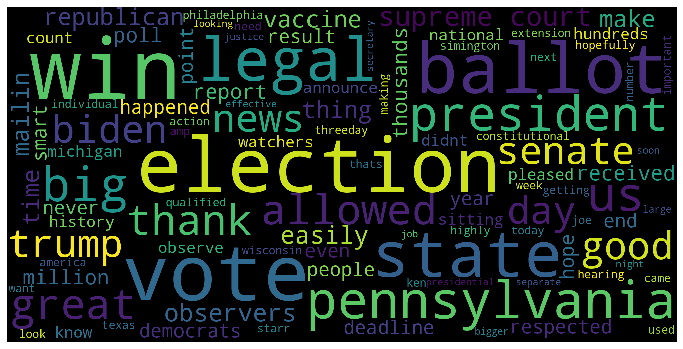

In [181]:
wordcloud = WordCloud(width = 2000, height = 1000, max_font_size = 250, max_words=100).generate(pos_text)
plt.figure(figsize=(12,12))
ax =plt.imshow(wordcloud)
plt.axis("off")

In [178]:
from nltk.probability import FreqDist
fdist = FreqDist(word_tokenize(pos_text))
pos_Freq_words=fdist.most_common(20)
pos_Freq_words

[('win', 16),
 ('election', 13),
 ('votes', 12),
 ('ballots', 9),
 ('legal', 8),
 ('president', 8),
 ('us', 8),
 ('big', 8),
 ('pennsylvania', 6),
 ('allowed', 6),
 ('states', 6),
 ('great', 6),
 ('would', 6),
 ('court', 6),
 ('news', 5),
 ('senate', 5),
 ('biden', 5),
 ('trump', 5),
 ('good', 5),
 ('thank', 5)]

In [179]:
dat = pd.DataFrame(pos_Freq_words,columns=["Frequent words", "Frequency"])
dat

,Frequent words,Frequency
0,win,16
1,election,13
2,votes,12
3,ballots,9
4,legal,8
5,president,8
6,us,8
7,big,8
8,pennsylvania,6
9,allowed,6


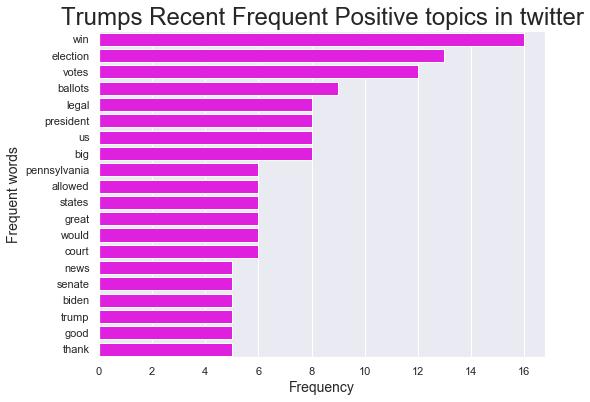

In [180]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x="Frequency", y="Frequent words", data=dat,color="magenta")
plt.title('Trumps Recent Frequent Positive topics in twitter', fontsize=24)
plt.ylabel('Frequent words', fontsize=14)
plt.xlabel('Frequency', fontsize=14)
plt.show()

### Most Neutral spoken words

In [182]:
dt.head()

,tweets,scores,compound,Sentiment
1,"voters in allentown, pa are receiving blank b...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3,it attempted to alter our election and got cau...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4,"help stop voter suppression, irregularities a...","{'neg': 0.3, 'neu': 0.572, 'pos': 0.129, 'comp...",-0.5562,Negative
5,fox news finally acknowledged eight days afte...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
6,the liberal media says voter fraud doesn't ha...,"{'neg': 0.291, 'neu': 0.61, 'pos': 0.1, 'compo...",-0.7449,Negative


In [183]:
Neu_tweets = dt[dt['Sentiment'] == 'Neutral']['tweets'].to_list()

In [184]:
Neu_tweets[0:10]

[' voters in allentown, pa are receiving blank ballots!! widespread!  have you received a blank ballot? email us photos at e',
 'it attempted to alter our election and got caught? ',
 ' fox news finally acknowledged eight days after the election that the fox news decision desk incorrectly projected that democra',
 ' in a sworn affidavit, an election worker in clark county, nevada, claims mail-in ballots were improperly filled out in a bi',
 'you are looking at ballots! is this what our country has come to? ',
 'richard hopkins, pennsylvania postal worker, recants ballot-tampering claim - washington times ',
 ' im here to stand with president he stood with me. hes the reason were going to have a senate majority. -',
 ' texas lt. gov. dan patrick offers $ million reward for evidence of voter fraud ',
 'obama spied on our campaign - and got caught! ',
 'only because of president trump, we are going to have a vaccine by the end of the year. ronny jackson, texas congressman-elect']

In [185]:
Neu_tweets_Cleaned = [cleaning_Unwanted(x) for x in Neu_tweets]

In [186]:
Neu_tweets_Cleaned[0:10]

['voters allentown  pa receiving blank ballots   widespread  received blank ballot  email us photos e',
 'attempted alter election got caught ',
 'fox news finally acknowledged eight days election fox news decision desk incorrectly projected democra',
 'sworn affidavit  election worker clark county  nevada  claims mailin ballots improperly filled bi',
 'looking ballots  country come ',
 'richard hopkins  pennsylvania postal worker  recants ballottampering claim  washington times',
 'im stand president stood  hes reason going senate majority  ',
 'texas lt gov  dan patrick offers  million reward evidence voter fraud',
 'obama spied campaign  got caught ',
 'president trump  going vaccine end year  ronny jackson  texas congressmanelect']

In [187]:
Neu_text=''
for text in Neu_tweets_Cleaned:
    Neu_text = Neu_text+text

(-0.5, 1999.5, 999.5, -0.5)

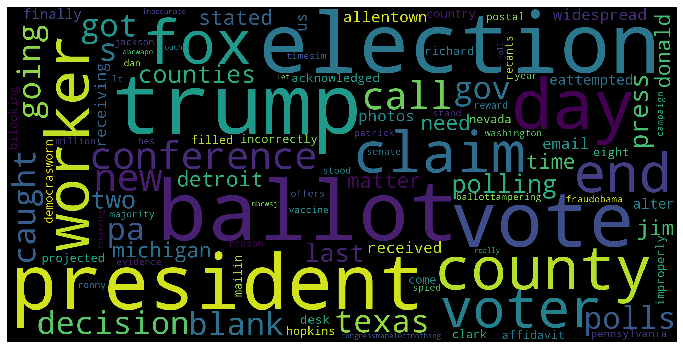

In [188]:
wordcloud = WordCloud(width = 2000, height = 1000, max_font_size = 250, max_words=100).generate(Neu_text)
plt.figure(figsize=(12,12))
ax =plt.imshow(wordcloud)
plt.axis("off")

In [189]:
from nltk.probability import FreqDist
fdist = FreqDist(word_tokenize(Neu_text))
pos_Freq_words=fdist.most_common(20)
pos_Freq_words

[('election', 6),
 ('trump', 6),
 ('president', 5),
 ('ballots', 4),
 ('vote', 4),
 ('fox', 3),
 ('days', 3),
 ('worker', 3),
 ('county', 3),
 ('conference', 3),
 ('call', 3),
 ('pa', 2),
 ('blank', 2),
 ('ballot', 2),
 ('got', 2),
 ('caught', 2),
 ('news', 2),
 ('claims', 2),
 ('going', 2),
 ('texas', 2)]

In [190]:
dat = pd.DataFrame(pos_Freq_words,columns=["Frequent words", "Frequency"])
dat

,Frequent words,Frequency
0,election,6
1,trump,6
2,president,5
3,ballots,4
4,vote,4
5,fox,3
6,days,3
7,worker,3
8,county,3
9,conference,3


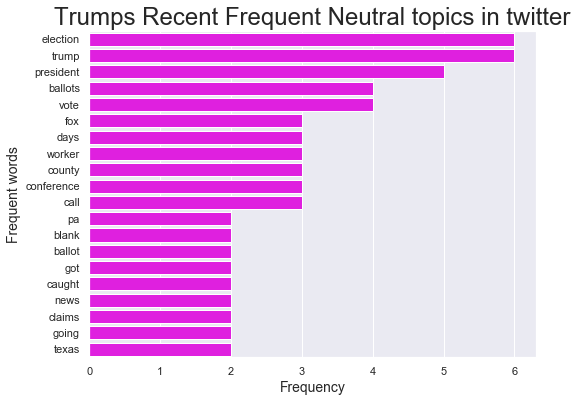

In [191]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x="Frequency", y="Frequent words", data=dat,color="magenta")
plt.title('Trumps Recent Frequent Neutral topics in twitter', fontsize=24)
plt.ylabel('Frequent words', fontsize=14)
plt.xlabel('Frequency', fontsize=14)
plt.show()